In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import HTML
from scipy.io import loadmat
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
import seaborn as sn
from mpl_toolkits import mplot3d
from itertools import compress
from mpl_toolkits.mplot3d import Axes3D
import random
import multiprocessing
from joblib import Parallel, delayed
import os
from pathlib import Path
NumThread=(multiprocessing.cpu_count()-1)*2
import pickle
from joblib import Parallel, delayed
from multiprocessing import cpu_count, Pool
import glob
from scipy.interpolate import interp1d

In [2]:
T = 4
scale = 0.008
res = np.load('/mnt/home/mplomecka/saccades/data/postprocessing/data/results.npy', allow_pickle=True).item()

# storing 
all_ftles = {(T, scale): res}
vc = all_ftles[(T, scale)]['vc']
ly_ids = all_ftles[(T, scale)]['ly_ids']

#Austin's function :
def unpackvcs(vcs, ids):
    unpacked = []
    trial = []
    for i in range(len(ids)):
        if i == 0:
            trial.append(vcs[:, i])
        elif ids[i] == ids[i - 1]:
            trial.append(vcs[:, i])
        else:
            unpacked.append(np.array(trial))
            trial = []
            trial.append(vcs[:, i])
        if i == len(ids) - 1:
            unpacked.append(np.array(trial))
    return unpacked

embedded_traj = unpackvcs(vc, ly_ids)

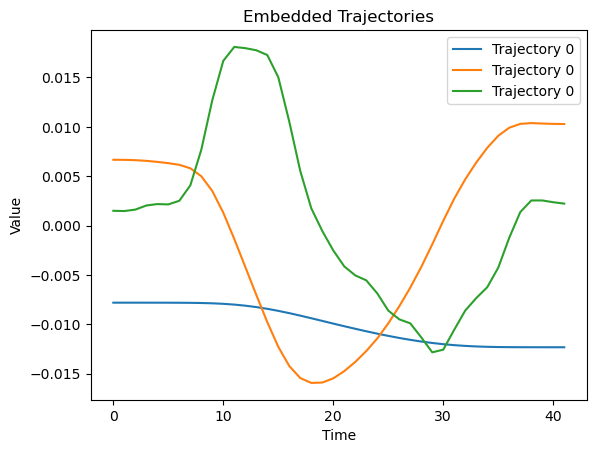

In [3]:
num_to_plot = 1

for i, traj in enumerate(embedded_traj[:num_to_plot]):
    plt.plot(traj, label=f'Trajectory {i}')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Embedded Trajectories')
plt.legend()
plt.show()


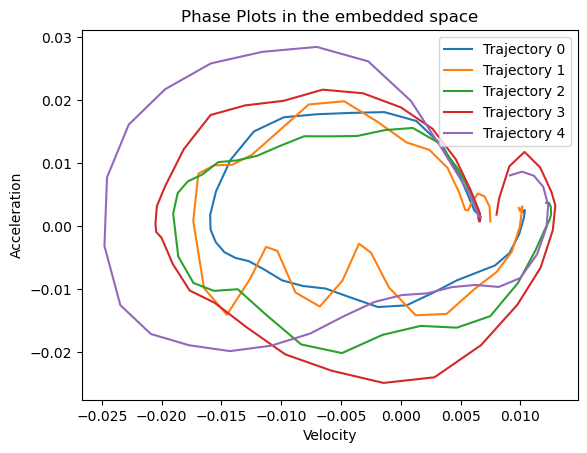

In [4]:
num_to_plot = 5

for i, traj in enumerate(embedded_traj[:num_to_plot]):
    velocity = traj[:, 1]  # Second vec (velocity)
    acceleration = traj[:, 2]  # Third vec (acceleration)
    plt.plot(velocity, acceleration, label=f'Trajectory {i}')

plt.xlabel('Velocity')
plt.ylabel('Acceleration')
plt.title('Phase Plots in the embedded space')
plt.legend()
plt.show()


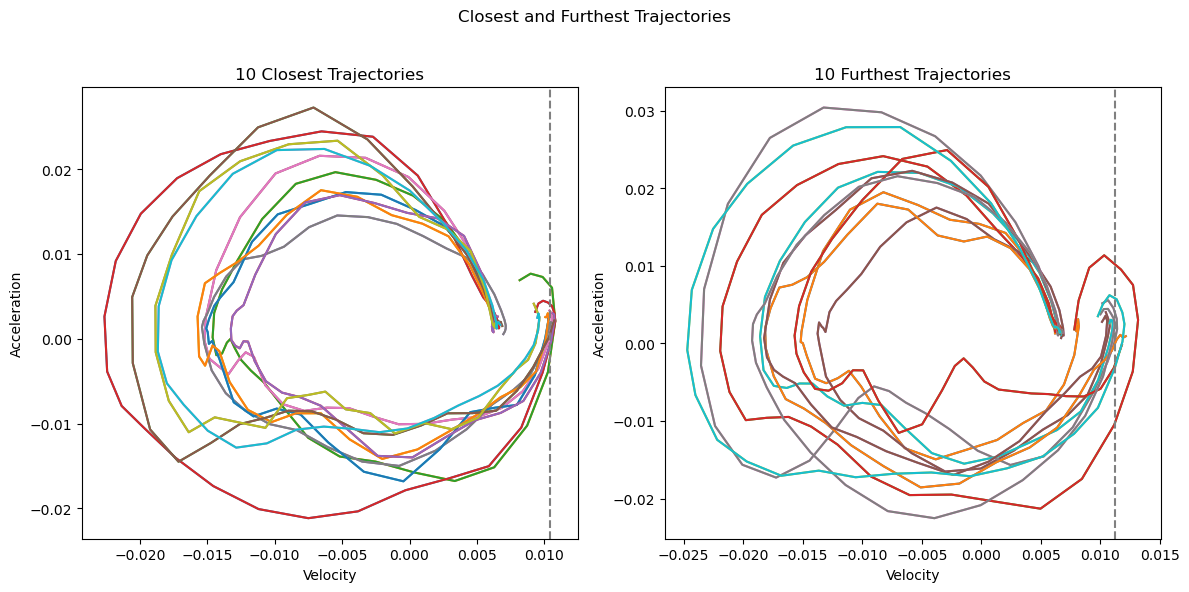

In [5]:
from scipy.spatial.distance import cdist


def mean_peak_velocity(indices):
    velocities = [embedded_traj[i][np.argmax(embedded_traj[i][:, 1]), 1] for i in indices]
    return np.mean(velocities)

peak_points = np.array([traj[np.argmax(traj[:, 1]), 1:3] for traj in embedded_traj])
distances = cdist(peak_points, peak_points)
np.fill_diagonal(distances, np.inf)

closest_indices = np.unravel_index(np.argsort(distances, axis=None)[:10], distances.shape)
furthest_indices = np.unravel_index(np.argsort(distances, axis=None)[-10:], distances.shape)
closest_indices_flat = np.unique(np.asarray(closest_indices).flatten())
furthest_indices_flat = np.unique(np.asarray(furthest_indices).flatten())

plt.figure(figsize=(12, 6))
plt.suptitle('Closest and Furthest Trajectories')

plt.subplot(1, 2, 1)
for i, j in zip(*closest_indices):
    plt.plot(embedded_traj[i][:, 1], embedded_traj[i][:, 2])
    plt.plot(embedded_traj[j][:, 1], embedded_traj[j][:, 2])
plt.axvline(x=mean_peak_velocity(closest_indices_flat), color='gray', linestyle='--')
plt.xlabel('Velocity')
plt.ylabel('Acceleration')
plt.title('10 Closest Trajectories')

plt.subplot(1, 2, 2)
for i, j in zip(*furthest_indices):
    plt.plot(embedded_traj[i][:, 1], embedded_traj[i][:, 2])
    plt.plot(embedded_traj[j][:, 1], embedded_traj[j][:, 2])
plt.axvline(x=mean_peak_velocity(furthest_indices_flat), color='gray', linestyle='--')
plt.xlabel('Velocity')
plt.ylabel('Acceleration')
plt.title('10 Furthest Trajectories')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
